# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
parameter_1 = 'q='
parameter_2 = '&appid='
#url = f"{base_url}{parameter_1}{query}{parameter_2}{weather_api_key}"
#print (url)#

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []
units = "Metric"
parameter_3 = '&units='

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{parameter_1}{city}{parameter_2}{weather_api_key}{parameter_3}{units}"
    print (city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=atuona&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 1 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?q=piacabucu&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 2 of Set 1 | piacabucu
http://api.openweathermap.org/data/2.5/weather?q=san patricio&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 3 of Set 1 | san patricio
http://api.openweathermap.org/data/2.5/weather?q=rikitea&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 4 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 5 of Set 1 | coquimbo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 6 of Set 1 | arraial do cabo
http://api.openweather

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=samalaeulu&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 4 of Set 2 | samalaeulu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=veraval&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 5 of Set 2 | veraval
http://api.openweathermap.org/data/2.5/weather?q=kalawit&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 6 of Set 2 | kalawit
http://api.openweathermap.org/data/2.5/weather?q=marawi&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 7 of Set 2 | marawi
http://api.openweathermap.org/data/2.5/weather?q=kaitangata&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 8 of Set 2 | kaitangata
http://api.openweathermap.org/data/2.5/weather?q=arroyo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 9 of Set 2 | arroyo
http://api.openweathermap.org/data/2.5/weather?q

http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 7 of Set 3 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=lagdo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 8 of Set 3 | lagdo
http://api.openweathermap.org/data/2.5/weather?q=zachagansk&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 9 of Set 3 | zachagansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=maceio&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 10 of Set 3 | maceio
http://api.openweathermap.org/data/2.5/weather?q=port hardy&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 11 of Set 3 | port hardy
http://api.openweathermap.org/data/2.5/weather?q=kalmunai&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 12 of Set 3 | kalmunai
http://api.openweathermap.org/data/2.5/weather?q=chuy&appid=7a377

http://api.openweathermap.org/data/2.5/weather?q=iqaluit&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 12 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?q=kijang&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 13 of Set 4 | kijang
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 14 of Set 4 | tuatapere
http://api.openweathermap.org/data/2.5/weather?q=pestravka&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 15 of Set 4 | pestravka
http://api.openweathermap.org/data/2.5/weather?q=alta floresta&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 16 of Set 4 | alta floresta
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 17 of Set 4 | mys shmidta
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=mar

http://api.openweathermap.org/data/2.5/weather?q=forbes&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 18 of Set 5 | forbes
http://api.openweathermap.org/data/2.5/weather?q=haines junction&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 19 of Set 5 | haines junction
http://api.openweathermap.org/data/2.5/weather?q=fougeres&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 20 of Set 5 | fougeres
http://api.openweathermap.org/data/2.5/weather?q=axim&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 21 of Set 5 | axim
http://api.openweathermap.org/data/2.5/weather?q=clyde river&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 22 of Set 5 | clyde river
http://api.openweathermap.org/data/2.5/weather?q=iquique&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 23 of Set 5 | iquique
http://api.openweathermap.org/data/2.5/weather?q=grand river south east&appid=7a377ca36b

http://api.openweathermap.org/data/2.5/weather?q=poum&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 24 of Set 6 | poum
http://api.openweathermap.org/data/2.5/weather?q=phan thiet&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 25 of Set 6 | phan thiet
http://api.openweathermap.org/data/2.5/weather?q=toliary&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 26 of Set 6 | toliary
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 27 of Set 6 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=garmsar&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 28 of Set 6 | garmsar
http://api.openweathermap.org/data/2.5/weather?q=copiapo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 29 of Set 6 | copiapo
http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit&a

http://api.openweathermap.org/data/2.5/weather?q=pandakan&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 30 of Set 7 | pandakan
http://api.openweathermap.org/data/2.5/weather?q=falealupo&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 31 of Set 7 | falealupo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=ust-maya&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 32 of Set 7 | ust-maya
http://api.openweathermap.org/data/2.5/weather?q=nara&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 33 of Set 7 | nara
http://api.openweathermap.org/data/2.5/weather?q=soledad&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 34 of Set 7 | soledad
http://api.openweathermap.org/data/2.5/weather?q=morant bay&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 35 of Set 7 | morant bay
http://api.openweathermap.org/data/2.5/weather?q=plettenberg bay&appid

http://api.openweathermap.org/data/2.5/weather?q=galbshtadt&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 35 of Set 8 | galbshtadt
http://api.openweathermap.org/data/2.5/weather?q=wellington&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 36 of Set 8 | wellington
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 37 of Set 8 | attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=lagoa&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 38 of Set 8 | lagoa
http://api.openweathermap.org/data/2.5/weather?q=college&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 39 of Set 8 | college
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 40 of Set 8 | mount gambier
http://api.openweathermap.org/data/2.5/weather?q

http://api.openweathermap.org/data/2.5/weather?q=hirado&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 38 of Set 9 | hirado
http://api.openweathermap.org/data/2.5/weather?q=arman&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 39 of Set 9 | arman
http://api.openweathermap.org/data/2.5/weather?q=chokwe&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 40 of Set 9 | chokwe
http://api.openweathermap.org/data/2.5/weather?q=durban&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 41 of Set 9 | durban
http://api.openweathermap.org/data/2.5/weather?q=visby&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 42 of Set 9 | visby
http://api.openweathermap.org/data/2.5/weather?q=tuggurt&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 43 of Set 9 | tuggurt
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=russell&appid=7a377ca36b94f99bc3a054d1b400c

http://api.openweathermap.org/data/2.5/weather?q=richards bay&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 43 of Set 10 | richards bay
http://api.openweathermap.org/data/2.5/weather?q=itoman&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 44 of Set 10 | itoman
http://api.openweathermap.org/data/2.5/weather?q=steinhagen&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 45 of Set 10 | steinhagen
http://api.openweathermap.org/data/2.5/weather?q=karachi&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 46 of Set 10 | karachi
http://api.openweathermap.org/data/2.5/weather?q=sri aman&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 47 of Set 10 | sri aman
http://api.openweathermap.org/data/2.5/weather?q=bosaso&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 48 of Set 10 | bosaso
http://api.openweathermap.org/data/2.5/weather?q=henties bay&appid=7a377ca36b94f99bc3a

http://api.openweathermap.org/data/2.5/weather?q=carire&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 47 of Set 11 | carire
http://api.openweathermap.org/data/2.5/weather?q=roald&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 48 of Set 11 | roald
http://api.openweathermap.org/data/2.5/weather?q=wewak&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 49 of Set 11 | wewak
http://api.openweathermap.org/data/2.5/weather?q=tessalit&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 0 of Set 12 | tessalit
http://api.openweathermap.org/data/2.5/weather?q=kegayli&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 1 of Set 12 | kegayli
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=yulara&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 2 of Set 12 | yulara
http://api.openweathermap.org/data/2.5/weather?q=kharian&appid=7a377ca36b94f99bc3a054

http://api.openweathermap.org/data/2.5/weather?q=zeya&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 1 of Set 13 | zeya
http://api.openweathermap.org/data/2.5/weather?q=ossora&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 2 of Set 13 | ossora
http://api.openweathermap.org/data/2.5/weather?q=zhanatas&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 3 of Set 13 | zhanatas
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=chaochou&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 4 of Set 13 | chaochou
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=champerico&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 5 of Set 13 | champerico
http://api.openweathermap.org/data/2.5/weather?q=uige&appid=7a377ca36b94f99bc3a054d1b400cdc0&units=Metric
Processing Record 6 of Set 13 | uige
http://api.openweathermap.org/data/2.5/weather?q=sredn

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,27.09,78,23,5.83,PF,1680050167
1,piacabucu,-10.4056,-36.4344,25.78,80,10,3.66,BR,1680050167
2,san patricio,28.0170,-97.5169,22.13,48,100,6.15,US,1680050167
3,rikitea,-23.1203,-134.9692,26.90,75,100,3.90,PF,1680050167
4,coquimbo,-29.9533,-71.3436,16.85,88,40,2.57,CL,1680049945


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,27.09,78,23,5.83,PF,1680050167
1,piacabucu,-10.4056,-36.4344,25.78,80,10,3.66,BR,1680050167
2,san patricio,28.0170,-97.5169,22.13,48,100,6.15,US,1680050167
3,rikitea,-23.1203,-134.9692,26.90,75,100,3.90,PF,1680050167
4,coquimbo,-29.9533,-71.3436,16.85,88,40,2.57,CL,1680049945


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

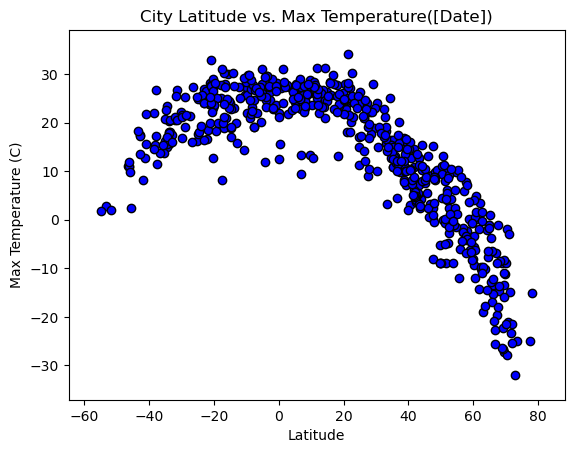

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature([Date])")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Max Temp"])-5, max(city_data_df["Max Temp"])+5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

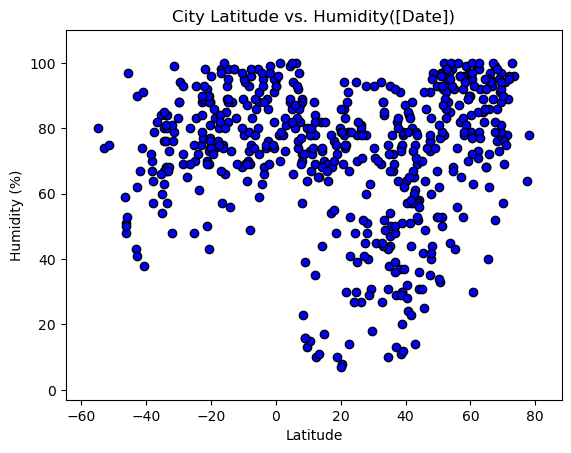

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity([Date])")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Humidity"])-10, max(city_data_df["Humidity"])+10)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

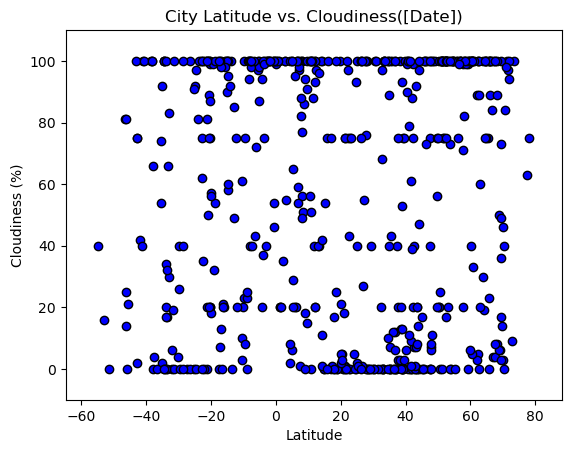

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness([Date])")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Cloudiness"])-10, max(city_data_df["Cloudiness"])+10)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

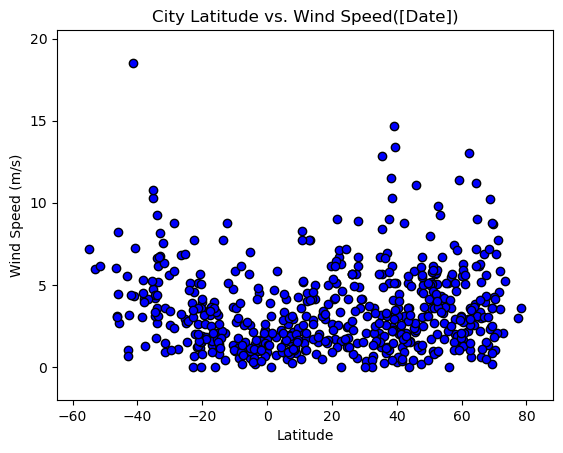

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black",color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed([Date])")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(min(city_data_df["Lat"])-10, max(city_data_df["Lat"])+10)
plt.ylim(min(city_data_df["Wind Speed"])-2, max(city_data_df["Wind Speed"])+2)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san patricio,28.0170,-97.5169,22.13,48,100,6.15,US,1680050167
6,sanmenxia,34.7747,111.1814,16.44,38,89,1.39,CN,1680050168
7,usinsk,65.9939,57.5281,-13.37,95,89,5.16,RU,1680050168
8,pishva,35.3080,51.7267,16.51,44,0,5.68,IR,1680050168
9,upernavik,72.7868,-56.1549,-32.08,100,9,2.05,GL,1680050168


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,27.09,78,23,5.83,PF,1680050167
1,piacabucu,-10.4056,-36.4344,25.78,80,10,3.66,BR,1680050167
3,rikitea,-23.1203,-134.9692,26.90,75,100,3.90,PF,1680050167
4,coquimbo,-29.9533,-71.3436,16.85,88,40,2.57,CL,1680049945
5,arraial do cabo,-22.9661,-42.0278,23.98,88,75,0.00,BR,1680050167


###  Temperature vs. Latitude Linear Regression Plot

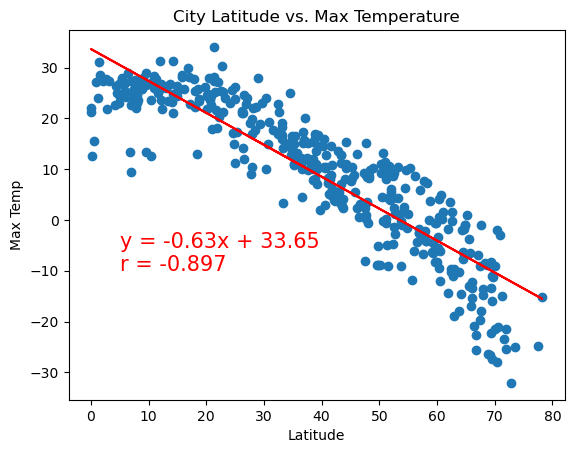

In [15]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
title = "City Latitude vs. Max Temperature"
text_coordinates = (5, -10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


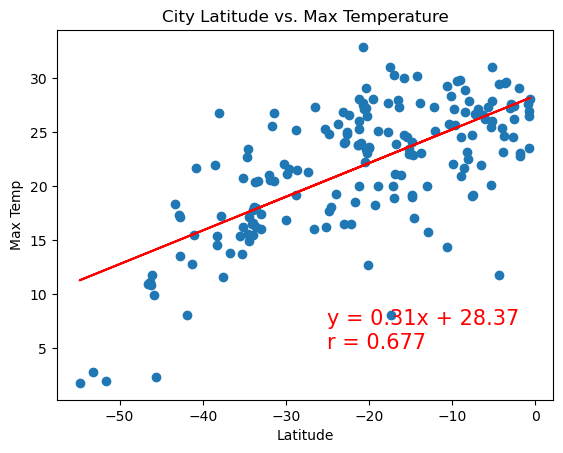

In [16]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
title = "City Latitude vs. Max Temperature"
text_coordinates = (-25, 5)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:** 
Temperature vs Latitude Linear Regression on the Northern hemisphere shows a good correlation with a r value close to 1 while
on the Southern hemisphere there is a fair correlation with a r value of 0.68 but as good as the Northen Hemisphere specialy at the lowest Latitudes. Both Linear Regression shows the temperature increasing more to the zero latitude mark(Equator).

### Humidity vs. Latitude Linear Regression Plot

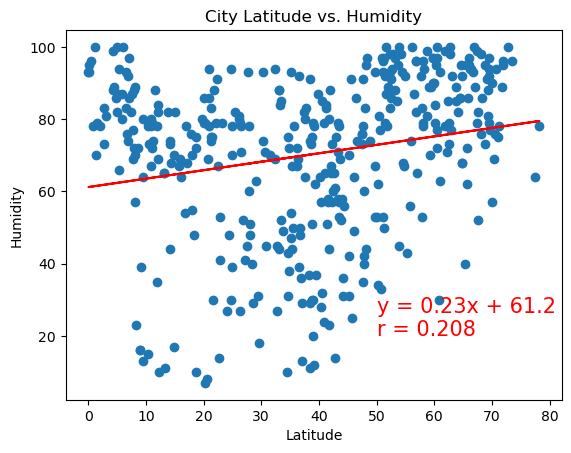

In [17]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "City Latitude vs. Humidity"
text_coordinates = (50, 20)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


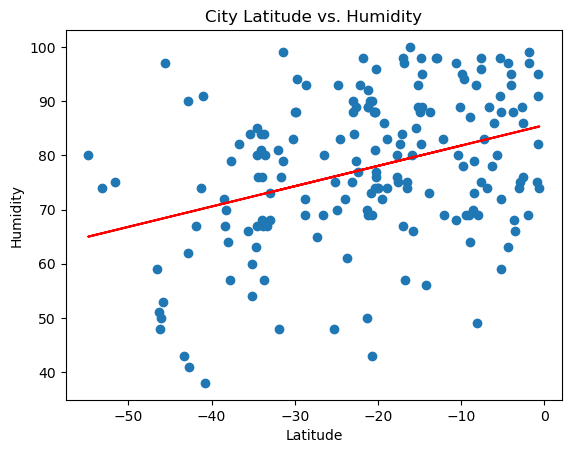

In [18]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
title = "City Latitude vs. Humidity"
text_coordinates = (-25, 50)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:**
City Latitude vs Humidity does not have a good correlation in both Hemispheres. The R values in both plots are closer to zero and the plot shows there is not much relationship between Latitudes and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

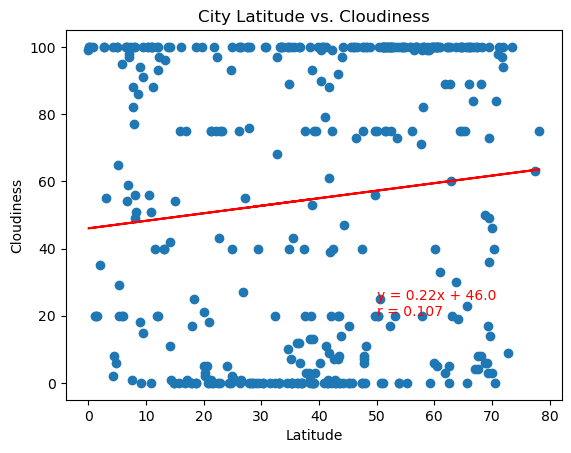

In [19]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=10, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "City Latitude vs. Cloudiness"
text_coordinates = (50, 20)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


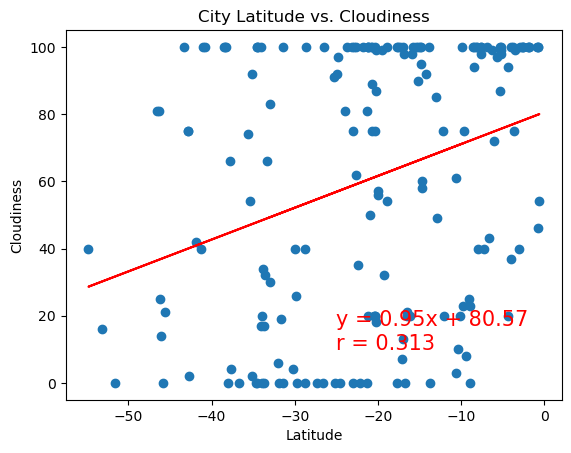

In [20]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
title = "City Latitude vs. Cloudiness"
text_coordinates = (-25, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:** 
City Latitude vs Cloudiness does not have a good correlation in both Hemispheres. The R values in both plots are closer to zero and the plot shows there is not much relationship between Latitudes and Cloudiness. The markers are scattered all over the plot showing very little correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

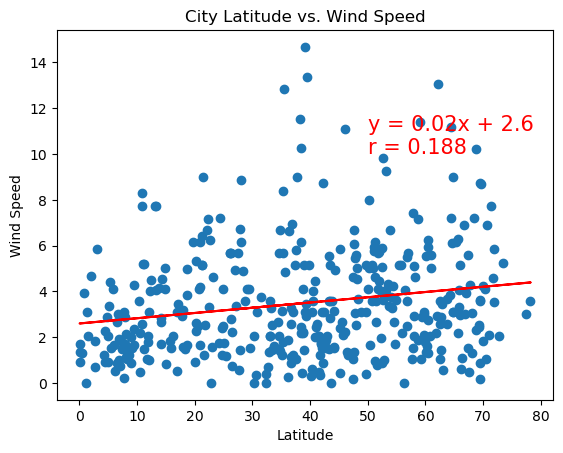

In [21]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
title = "City Latitude vs. Wind Speed"
text_coordinates = (50, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


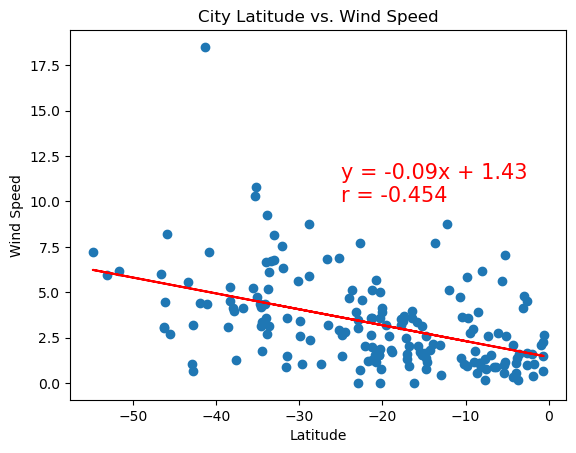

In [22]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r")
    
    # Annotate plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}\nr = {round(rvalue,3)}", text_coordinates, fontsize=15, color="red")
    
    # Show plot
    plt.show() 

# Call the function to plot the Northern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
title = "City Latitude vs. Wind Speed"
text_coordinates = (-25, 10)
plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)


**Discussion about the linear relationship:** 
City Latitude vs Wind speed does not have a good correlation in both Hemispheres. The R values in both plots are closer to zero and the plot shows there is not much relationship between Latitudes and Wind speed. The Southern hemisphere does show better correlation between these two values than the Northern Hemisphere. However this could be due to external factors such a cities being closer to the ocean when we move closer to zero latitude due to the high temperatures.